In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
data = {
    'user_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'user_age': [25, 34, 45, 23, 52, 46, 38, 29, 31, 27],
    'product_id': ['A', 'B', 'C', 'A', 'C', 'B', 'A', 'C', 'B', 'A'],
    'product_category': ['electronics', 'fashion', 'fashion', 'electronics', 'fashion',
                         'fashion', 'electronics', 'fashion', 'fashion', 'electronics'],
    'product_price': [200, 50, 60, 220, 70, 55, 210, 65, 45, 230],
    'liked': [1, 0, 1, 1, 0, 0, 1, 1, 0, 1]
}
df = pd.DataFrame(data)

In [3]:
product = LabelEncoder()
df['product_id_enc'] = product.fit_transform(df['product_id'])

In [9]:
df['product_id_enc']

,product_id_enc
0,0
1,1
2,2
3,0
4,2
5,1
6,0
7,2
8,1
9,0


In [4]:
category = LabelEncoder()
df['product_category_enc'] = category.fit_transform(df['product_category'])

In [10]:
df['product_category_enc']

,product_category_enc
0,0
1,1
2,1
3,0
4,1
5,1
6,0
7,1
8,1
9,0


In [2]:
df=pd.read_csv('/content/drive/MyDrive/Crop_recommendation.csv')

In [3]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [4]:
category = LabelEncoder()
df['label'] = category.fit_transform(df['label'])

In [5]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


In [6]:
X = df[['N', 'P', 'K']]
y = df['label']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
X_train.shape, X_test.shape

((1540, 3), (660, 3))

In [9]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
y_pred = model.predict(X_test)

In [12]:
new_data=[[100,78,34]]
pre=model.predict(new_data)
pre

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [20]:
new_user = pd.DataFrame({
    'user_age': [13],
    'product_id_enc': product.transform(['A']),
    'product_category_enc': category.transform(['electronics']),
    'product_price': [12]
})

prediction = model.predict(new_user)
print("Like this product so recommend" if prediction[0] == 1 else "Not Recommended")


Like this product so recommend


Confusion Matrix:
 [[26  0]
 [ 0 15]]


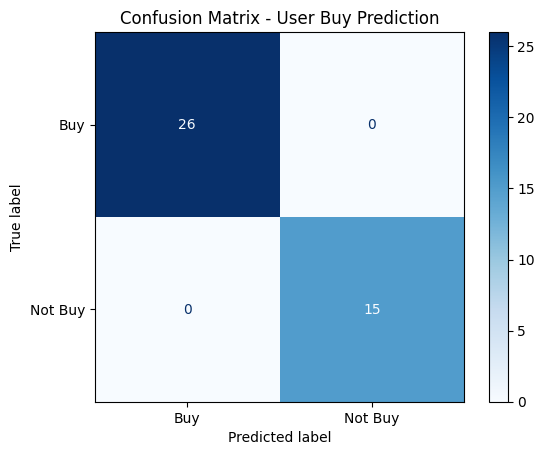

In [13]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
print("Confusion Matrix:\n", cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Buy", "Not Buy"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - User Buy Prediction")
plt.show()



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy : {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall   : {recall:.2f}")
print(f"F1 Score : {f1:.2f}")